In [1]:
import pandas as pd
import numpy as np
from scipy import stats
# featuretools for automated feature engineering
# import featuretools as ft
import math

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
# plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# modeling 
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")
# memory management
import gc

In [2]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv("dataset.csv")


In [4]:
from sklearn.model_selection import train_test_split
# import mglearn

In [5]:
X = df.drop(['당뇨여부','식전혈당(공복혈당)'], axis=1).copy()
X

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,수축기혈압,이완기혈압,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,BMI
0,1,8,170,75,90.0,120.0,80.0,1.0,1.0,21.0,35.0,40.0,1.0,1.0,25.95
1,1,7,180,80,89.0,130.0,82.0,1.0,0.9,20.0,36.0,27.0,3.0,0.0,24.69
2,1,9,165,75,91.0,120.0,70.0,1.0,0.9,47.0,32.0,68.0,1.0,0.0,27.55
3,1,11,175,80,91.0,145.0,87.0,1.0,1.1,29.0,34.0,18.0,1.0,0.0,26.12
4,1,11,165,60,80.0,138.0,82.0,1.0,0.8,19.0,12.0,25.0,1.0,0.0,22.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866604,2,11,165,75,84.0,110.0,70.0,1.0,0.7,18.0,15.0,19.0,1.0,0.0,27.55
1866605,1,7,170,75,88.0,136.0,88.0,1.0,1.0,25.0,36.0,90.0,1.0,1.0,25.95
1866606,1,8,175,80,87.0,162.0,90.0,1.0,0.9,21.0,15.0,36.0,2.0,1.0,26.12
1866607,1,11,165,70,80.2,140.0,98.0,1.0,1.2,20.0,18.0,14.0,2.0,0.0,25.71


In [6]:
y = df[['당뇨여부']]
y

,당뇨여부
0,0
1,0
2,0
3,0
4,0
...,...
1866604,0
1866605,0
1866606,0
1866607,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, random_state=42)

In [8]:
from lightgbm import LGBMClassifier, plot_importance

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [10]:
lgb = LGBMClassifier(n_estimators=400)
evals = [(x_test, y_test)]


In [11]:
lgb.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="logloss",eval_set=evals, verbose=True)

[1]	valid_0's binary_logloss: 0.214855
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.211186
[3]	valid_0's binary_logloss: 0.208234
[4]	valid_0's binary_logloss: 0.205865
[5]	valid_0's binary_logloss: 0.203764
[6]	valid_0's binary_logloss: 0.202023
[7]	valid_0's binary_logloss: 0.200545
[8]	valid_0's binary_logloss: 0.199262
[9]	valid_0's binary_logloss: 0.198152
[10]	valid_0's binary_logloss: 0.197216
[11]	valid_0's binary_logloss: 0.196357
[12]	valid_0's binary_logloss: 0.19562
[13]	valid_0's binary_logloss: 0.194951
[14]	valid_0's binary_logloss: 0.194346
[15]	valid_0's binary_logloss: 0.193839
[16]	valid_0's binary_logloss: 0.193377
[17]	valid_0's binary_logloss: 0.192966
[18]	valid_0's binary_logloss: 0.192579
[19]	valid_0's binary_logloss: 0.192248
[20]	valid_0's binary_logloss: 0.191949
[21]	valid_0's binary_logloss: 0.191665
[22]	valid_0's binary_logloss: 0.191426
[23]	valid_0's binary_logloss: 0.191188
[24]	valid_0's binary_loglos

[213]	valid_0's binary_logloss: 0.188482
[214]	valid_0's binary_logloss: 0.188479
[215]	valid_0's binary_logloss: 0.188478
[216]	valid_0's binary_logloss: 0.188478
[217]	valid_0's binary_logloss: 0.188479
[218]	valid_0's binary_logloss: 0.188479
[219]	valid_0's binary_logloss: 0.188477
[220]	valid_0's binary_logloss: 0.188477
[221]	valid_0's binary_logloss: 0.188478
[222]	valid_0's binary_logloss: 0.188478
[223]	valid_0's binary_logloss: 0.1885
[224]	valid_0's binary_logloss: 0.188502
[225]	valid_0's binary_logloss: 0.188502
[226]	valid_0's binary_logloss: 0.188504
[227]	valid_0's binary_logloss: 0.188505
[228]	valid_0's binary_logloss: 0.188504
[229]	valid_0's binary_logloss: 0.188503
[230]	valid_0's binary_logloss: 0.188503
Early stopping, best iteration is:
[130]	valid_0's binary_logloss: 0.188454


LGBMClassifier(n_estimators=400)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

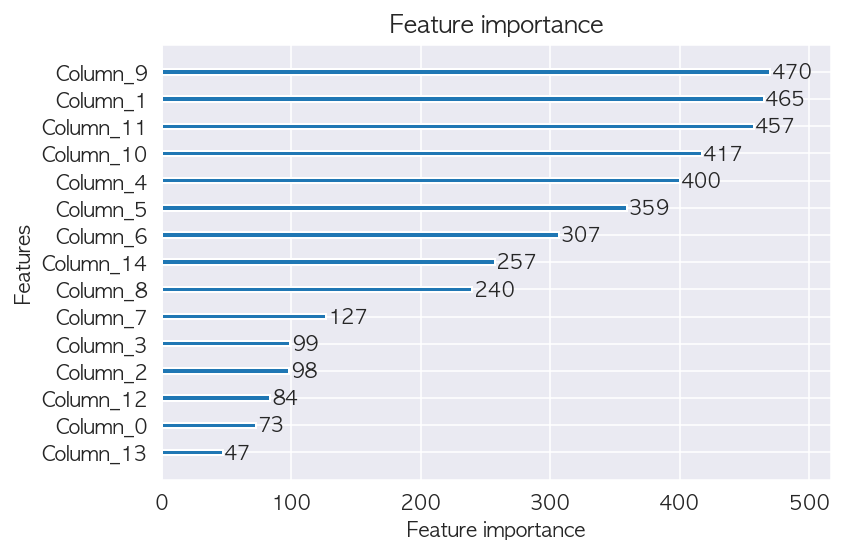

In [12]:
plot_importance(lgb)

In [13]:
lgb.feature_importances_

array([ 73, 465,  98,  99, 400, 359, 307, 127, 240, 470, 417, 457,  84,
        47, 257], dtype=int32)

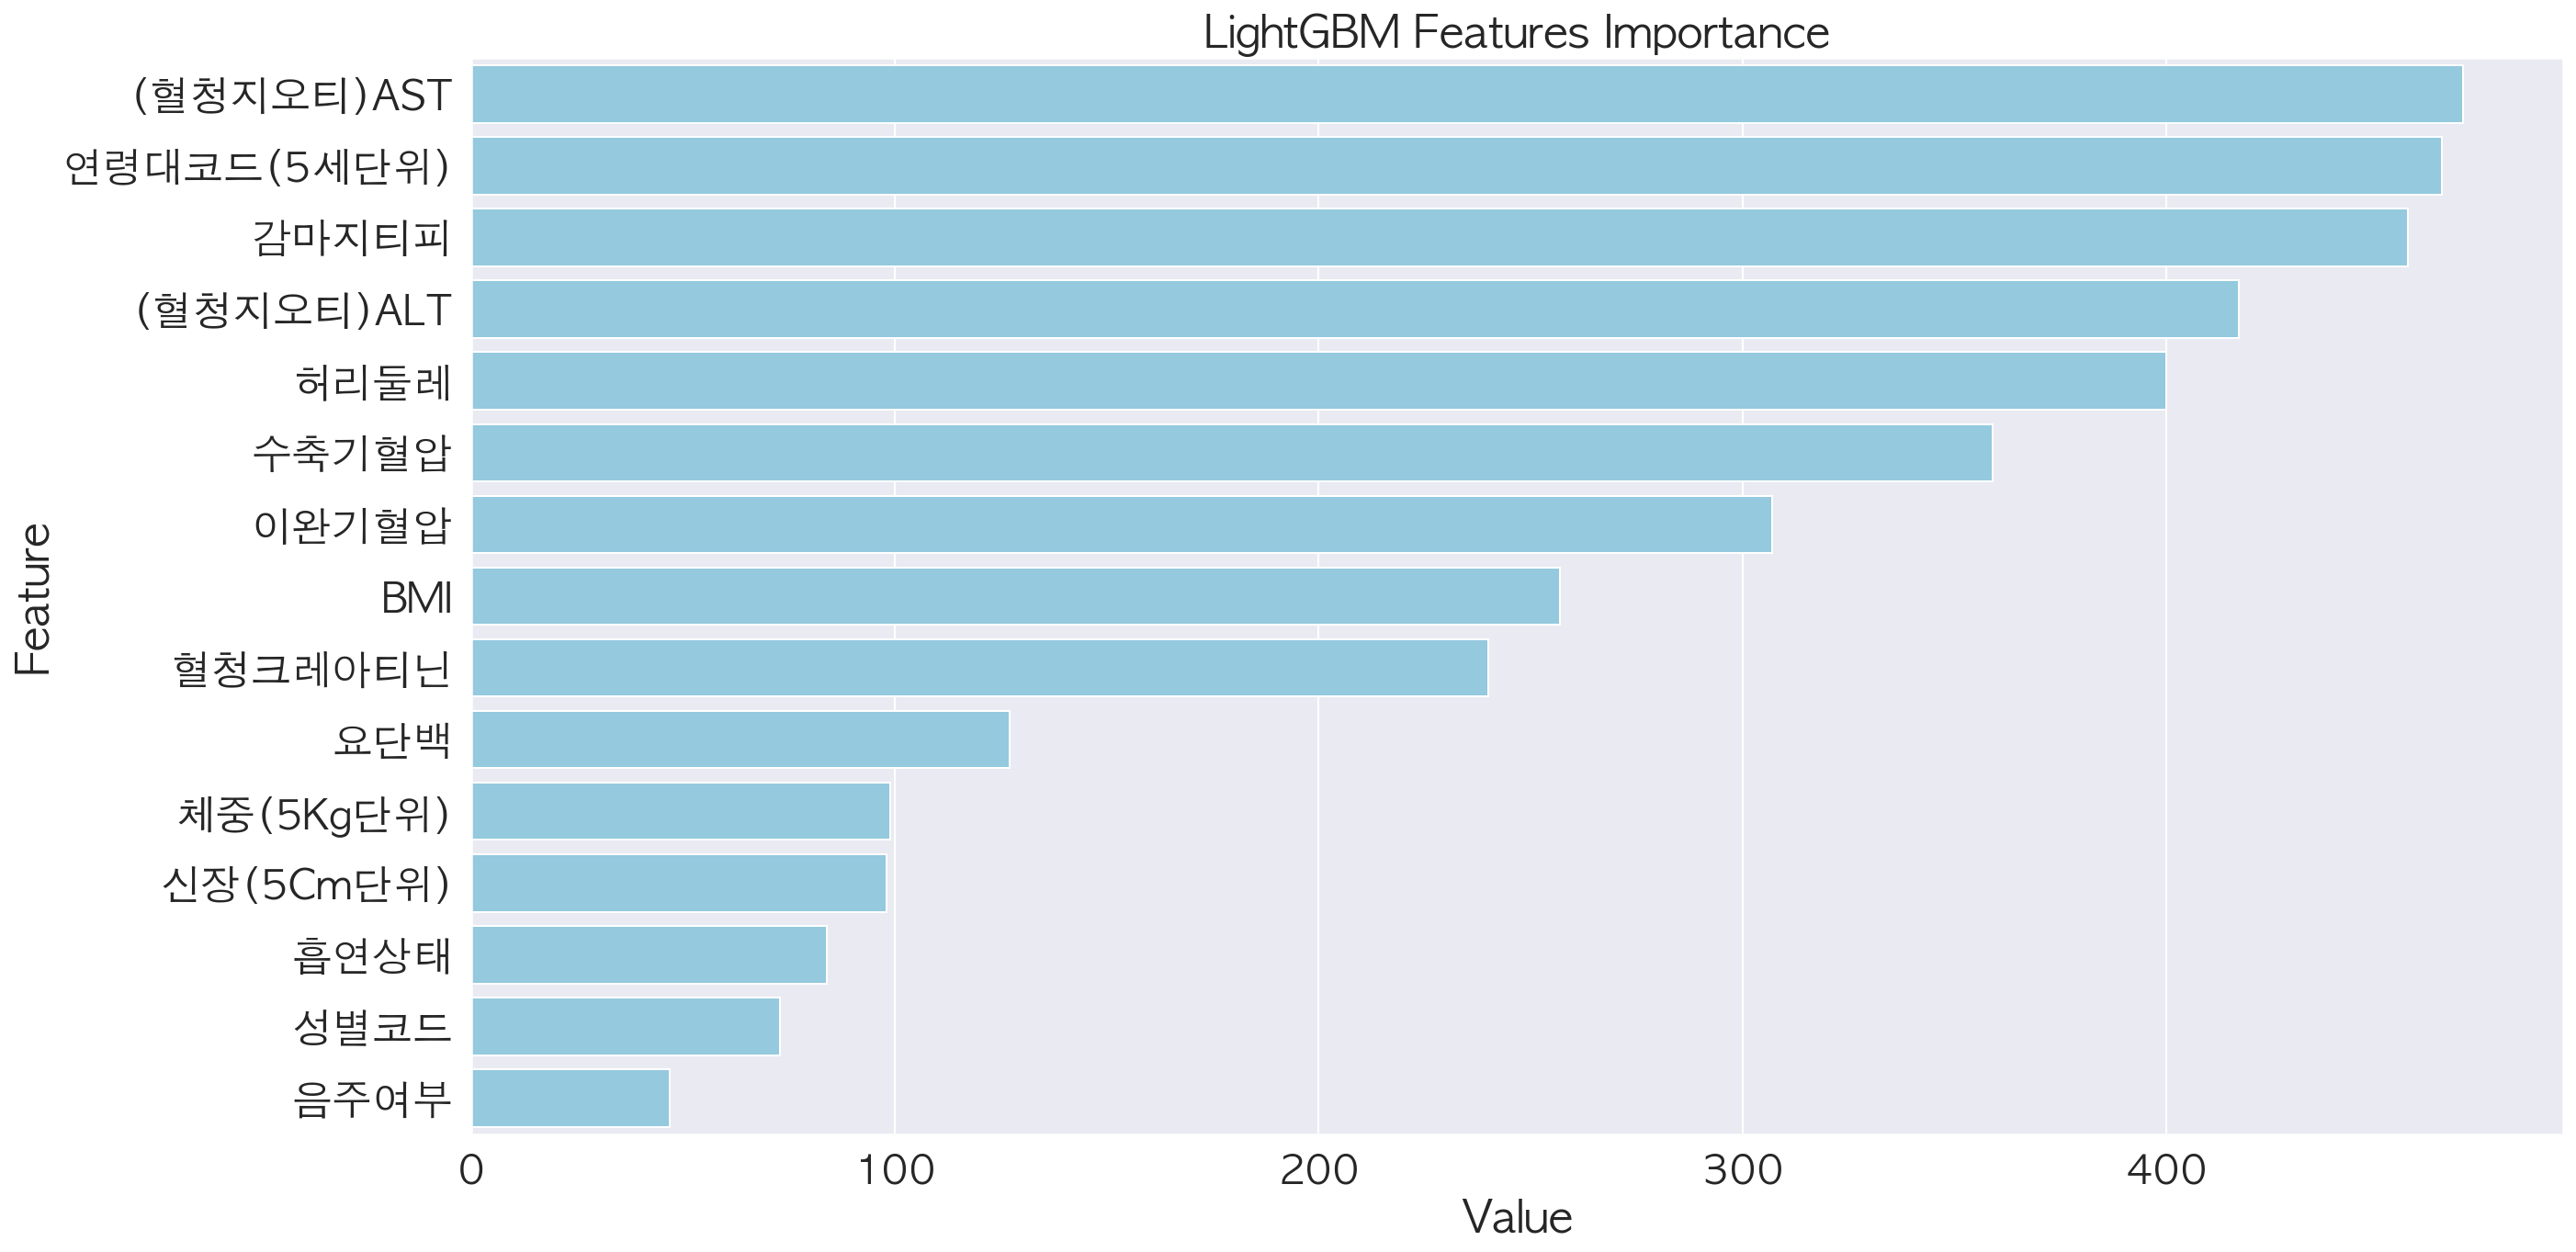

In [17]:
feature_imp = pd.DataFrame(sorted(zip(lgb.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.set(font_scale=2, font="AppleGothic")
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False), color="skyblue")
plt.title('LightGBM Features Importance')
plt.tight_layout()
plt.show()